In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
import keras.layers as layers

Using TensorFlow backend.


In [24]:
data = pd.read_csv('../inputData/fb.us.txt')
#data.Date = pd.to_datetime(fb_stocks.Date)
#data.drop(columns='OpenInt', inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2012-05-18,42.05,45.00,38.00,38.23,580438450,0
1,2012-05-21,36.53,36.66,33.00,34.03,169418988,0
2,2012-05-22,32.61,33.59,30.94,31.00,101876406,0
3,2012-05-23,31.37,32.50,31.36,32.00,73678512,0
4,2012-05-24,32.95,33.21,31.77,33.03,42560731,0


In [10]:
Xcol = fb_stocks.columns[1:]
scaled = MinMaxScaler().fit_transform(fb_stocks[Xcol])
dataSc = pd.DataFrame(data=scaled, columns=Xcol)

In [17]:
dataSc

,Open,High,Low,Close,Volume
0,0.145909,0.162364,0.125445,0.124295,1.000000
1,0.112308,0.111705,0.094774,0.098830,0.284593
2,0.088447,0.093057,0.082137,0.080458,0.167031
3,0.080898,0.086436,0.084714,0.086522,0.117950
4,0.090516,0.090749,0.087229,0.092767,0.063788
...,...,...,...,...,...
1376,0.976869,0.985118,0.986137,0.984903,0.012815
1377,0.988678,0.986928,0.992841,0.985388,0.012168
1378,0.984356,0.984511,0.991044,0.981204,0.007928
1379,0.975347,0.978740,0.978653,0.979628,0.011643


In [ ]:
gen = TimeseriesGenerator()

# Following example of how to make multivariate timeseries
https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/


In [14]:
# define dataset
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95, 105])

# reshape series
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))

# horizontally stack columns
dataset = np.hstack((in_seq1, in_seq2))

In [15]:
dataset

array([[ 10,  15],
       [ 20,  25],
       [ 30,  35],
       [ 40,  45],
       [ 50,  55],
       [ 60,  65],
       [ 70,  75],
       [ 80,  85],
       [ 90,  95],
       [100, 105]])

In [121]:
dataSc.iloc[:,:2]
np.array(dataSc)

array([[0.14590942, 0.16236409, 0.12544473, 0.12429516, 1.        ],
       [0.11230825, 0.11170504, 0.09477365, 0.09882981, 0.28459312],
       [0.08844655, 0.09305716, 0.08213716, 0.08045838, 0.16703073],
       ...,
       [0.98435598, 0.98451072, 0.99104404, 0.98120415, 0.0079276 ],
       [0.97534697, 0.97874021, 0.97865293, 0.97962772, 0.01164298],
       [0.97559046, 0.97691794, 0.98398969, 0.97453465, 0.00895932]])

In [67]:
# Determine where the index separating the training from the test set is. We will start with a 80% train/test split.
divIndex = round(dataSc.shape[0] * 0.8)
divIndex
train = dataSc.iloc[:divIndex,:]
test = dataSc.iloc[divIndex:,:]
test.head()

,Open,High,Low,Close,Volume
1105,0.679328,0.682925,0.684885,0.682168,0.014711
1106,0.682676,0.682561,0.678935,0.673801,0.018485
1107,0.675250,0.676608,0.680346,0.674953,0.007169
1108,0.670380,0.668043,0.669856,0.667495,0.018037
1109,0.672084,0.672295,0.674948,0.667859,0.010866


In [214]:
batch_size = 30
n_input = 20
seqTrain = TimeseriesGenerator(data=np.array(train), targets=np.array(train.Open), length=20, batch_size=30) #end_index=divIndex
seqTest = TimeseriesGenerator(data=np.array(test), targets=np.array(test.Open), length=20, batch_size=30) #start_index=divIndex + 1,

In [185]:
print(seqTrain.data.shape)
print(seqTrain.targets.shape)
#stepsEpochTrain = len

(1105, 5)
(1105,)


In [210]:
seqTrain.__dict__

{'data': array([[0.14590942, 0.16236409, 0.12544473, 0.12429516, 1.        ],
        [0.11230825, 0.11170504, 0.09477365, 0.09882981, 0.28459312],
        [0.08844655, 0.09305716, 0.08213716, 0.08045838, 0.16703073],
        ...,
        [0.67062333, 0.67138432, 0.67648141, 0.67143637, 0.0105741 ],
        [0.67171902, 0.67296362, 0.67801497, 0.67307343, 0.0093091 ],
        [0.67543219, 0.67411772, 0.67954852, 0.67458922, 0.01034104]]),
 'targets': array([0.14590942, 0.11230825, 0.08844655, ..., 0.67062333, 0.67171902,
        0.67543219]),
 'length': 20,
 'sampling_rate': 1,
 'stride': 1,
 'start_index': 20,
 'end_index': 1104,
 'shuffle': False,
 'reverse': False,
 'batch_size': 30}

In [213]:
seqTrain.

TypeError: 'bool' object is not callable

Now we have our training and testsequence, so we can move to the model.

In [ ]:
# n_features = train.shape[1]

model1 = Sequential([
    layers.LSTM(100, activation='relu', input_shape=(1105, 20 ,5)),   
])

# layers.Dropout(0.5),
# layers.Dense(50, activation='elu'),
# layers.Dropout(0.5),
# layers.Dense(2, activation='softmax')

In [178]:
model1.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])
#steps_per_epoch = 

In [186]:
model1.fit(x=seqTrain.data, y=seqTrain.targets)

ValueError: Error when checking input: expected lstm_17_input to have 3 dimensions, but got array with shape (1105, 5)

In [179]:
model1.fit_generator(generator=seqTrain,
                     
                     epochs=10, 
                     )

Epoch 1/10


ValueError: Error when checking target: expected lstm_17 to have shape (100,) but got array with shape (1,)

In [163]:
dataSc

,Open,High,Low,Close,Volume
0,0.145909,0.162364,0.125445,0.124295,1.000000
1,0.112308,0.111705,0.094774,0.098830,0.284593
2,0.088447,0.093057,0.082137,0.080458,0.167031
3,0.080898,0.086436,0.084714,0.086522,0.117950
4,0.090516,0.090749,0.087229,0.092767,0.063788
...,...,...,...,...,...
1376,0.976869,0.985118,0.986137,0.984903,0.012815
1377,0.988678,0.986928,0.992841,0.985388,0.012168
1378,0.984356,0.984511,0.991044,0.981204,0.007928
1379,0.975347,0.978740,0.978653,0.979628,0.011643


In [199]:
n_features
input_feature= dataSc.iloc[:,:n_features].values
input_data = input_feature
stock_data = dataSc

In [208]:
lookback = 50
test_size=int(.3 * len(stock_data))
X=[]
y=[]
for i in range(len(stock_data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,0])

In [206]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, n_features)
X_test = X_test.reshape(X_test.shape[0],lookback, n_features)
print(X.shape)
print(X_test.shape)

(1330, 50, 5)
(464, 50, 5)


In [176]:
(X.shape[1],2)

(50, 2)

In [173]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 50, 30)            3960      
_________________________________________________________________
lstm_15 (LSTM)               (None, 50, 30)            7320      
_________________________________________________________________
lstm_16 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [174]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [188]:
model.fit(X, y, epochs=10, batch_size=32, verbose=0)

In [216]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [194]:
series_to_supervised(dataSc, n_in=30, n_out=1)

,var1(t-30),var2(t-30),var3(t-30),var4(t-30),var5(t-30),var1(t-29),var2(t-29),var3(t-29),var4(t-29),var5(t-29),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
30,0.145909,0.162364,0.125445,0.124295,1.000000,0.112308,0.111705,0.094774,0.098830,0.284593,...,0.084246,0.083338,0.081033,0.081004,0.023681,0.080168,0.081759,0.079745,0.079064,0.014299
31,0.112308,0.111705,0.094774,0.098830,0.284593,0.088447,0.093057,0.082137,0.080458,0.167031,...,0.080168,0.081759,0.079745,0.079064,0.014299,0.078098,0.079998,0.081278,0.081671,0.004965
32,0.088447,0.093057,0.082137,0.080458,0.167031,0.080898,0.086436,0.084714,0.086522,0.117950,...,0.078098,0.079998,0.081278,0.081671,0.004965,0.080351,0.081152,0.082628,0.083308,0.007174
33,0.080898,0.086436,0.084714,0.086522,0.117950,0.090516,0.090749,0.087229,0.092767,0.063788,...,0.080351,0.081152,0.082628,0.083308,0.007174,0.081325,0.082792,0.084100,0.084884,0.008763
34,0.090516,0.090749,0.087229,0.092767,0.063788,0.090212,0.089170,0.083180,0.085976,0.054393,...,0.081325,0.082792,0.084100,0.084884,0.008763,0.085342,0.088744,0.088578,0.087552,0.020643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,0.920136,0.917391,0.883389,0.880010,0.061440,0.891283,0.894308,0.890872,0.888134,0.030330,...,0.981312,0.981534,0.976322,0.977324,0.020729,0.976869,0.985118,0.986137,0.984903,0.012815
1377,0.891283,0.894308,0.890872,0.888134,0.030330,0.899805,0.911559,0.907987,0.909174,0.023040,...,0.976869,0.985118,0.986137,0.984903,0.012815,0.988678,0.986928,0.992841,0.985388,0.012168
1378,0.899805,0.911559,0.907987,0.909174,0.023040,0.912223,0.915993,0.917740,0.915540,0.010876,...,0.988678,0.986928,0.992841,0.985388,0.012168,0.984356,0.984511,0.991044,0.981204,0.007928
1379,0.912223,0.915993,0.917740,0.915540,0.010876,0.917641,0.931726,0.927862,0.928515,0.016342,...,0.984356,0.984511,0.991044,0.981204,0.007928,0.975347,0.978740,0.978653,0.979628,0.011643


In [228]:
from splitSequence import split_sequence

In [234]:
cols = list(dataSc.columns)
dataSc['Open']

0       0.145909
1       0.112308
2       0.088447
3       0.080898
4       0.090516
          ...   
1376    0.976869
1377    0.988678
1378    0.984356
1379    0.975347
1380    0.975590
Name: Open, Length: 1381, dtype: float64

In [237]:
split_sequence(np.array(dataSc['Open']), 30)

TypeError: 'NoneType' object is not iterable

In [230]:
n_steps = 30
X = [(split_sequence(dataSc[col], n_steps)) for col in cols]

In [231]:
X

[None, None, None, None, None]

In [240]:
df = dataSc
input_cols = df.columns
# Put your inputs into a single list
df['single_input_vector'] = df[input_cols].apply(tuple, axis=1).apply(list)
# Double-encapsulate list so that you can sum it in the next step and keep time steps as separate elements
df['single_input_vector'] = df.single_input_vector.apply(lambda x: [list(x)])
# Use .cumsum() to include previous row vectors in the current row list of vectors
df['cumulative_input_vectors'] = df.single_input_vector.cumsum()

In [245]:
df.head()

,Open,High,Low,Close,Volume,single_input_vector,cumulative_input_vectors
0,0.145909,0.162364,0.125445,0.124295,1.000000,"[[0.1459094229364499, 0.16236408916965317, 0.1...","[[0.1459094229364499, 0.16236408916965317, 0.1..."
1,0.112308,0.111705,0.094774,0.098830,0.284593,"[[0.11230825420014609, 0.11170503553422825, 0....","[[0.1459094229364499, 0.16236408916965317, 0.1..."
2,0.088447,0.093057,0.082137,0.080458,0.167031,"[[0.08844655466277088, 0.09305715847658388, 0....","[[0.1459094229364499, 0.16236408916965317, 0.1..."
3,0.080898,0.086436,0.084714,0.086522,0.117950,"[[0.08089846603360115, 0.0864362509870619, 0.0...","[[0.1459094229364499, 0.16236408916965317, 0.1..."
4,0.090516,0.090749,0.087229,0.092767,0.063788,"[[0.09051619186754323, 0.0907489521958331, 0.0...","[[0.1459094229364499, 0.16236408916965317, 0.1..."


In [247]:
output_cols = 'Open'
#df['output_vector'] = df[output_cols].apply(tuple, axis=1).apply(list)
df['output_vector'] = df.Open

In [248]:
df.head()

,Open,High,Low,Close,Volume,single_input_vector,cumulative_input_vectors,output_vector
0,0.145909,0.162364,0.125445,0.124295,1.000000,"[[0.1459094229364499, 0.16236408916965317, 0.1...","[[0.1459094229364499, 0.16236408916965317, 0.1...",0.145909
1,0.112308,0.111705,0.094774,0.098830,0.284593,"[[0.11230825420014609, 0.11170503553422825, 0....","[[0.1459094229364499, 0.16236408916965317, 0.1...",0.112308
2,0.088447,0.093057,0.082137,0.080458,0.167031,"[[0.08844655466277088, 0.09305715847658388, 0....","[[0.1459094229364499, 0.16236408916965317, 0.1...",0.088447
3,0.080898,0.086436,0.084714,0.086522,0.117950,"[[0.08089846603360115, 0.0864362509870619, 0.0...","[[0.1459094229364499, 0.16236408916965317, 0.1...",0.080898
4,0.090516,0.090749,0.087229,0.092767,0.063788,"[[0.09051619186754323, 0.0907489521958331, 0.0...","[[0.1459094229364499, 0.16236408916965317, 0.1...",0.090516


In [249]:
# Pad your sequences so they are the same length
from keras.preprocessing.sequence import pad_sequences

max_sequence_length = df.cumulative_input_vectors.apply(len).max()
# Save it as a list   
padded_sequences = pad_sequences(df.cumulative_input_vectors.tolist(), max_sequence_length).tolist()
df['padded_input_vectors'] = pd.Series(padded_sequences).apply(np.asarray)

In [250]:
df.head()

,Open,High,Low,Close,Volume,single_input_vector,cumulative_input_vectors,output_vector,padded_input_vectors
0,0.145909,0.162364,0.125445,0.124295,1.000000,"[[0.1459094229364499, 0.16236408916965317, 0.1...","[[0.1459094229364499, 0.16236408916965317, 0.1...",0.145909,"[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0..."
1,0.112308,0.111705,0.094774,0.098830,0.284593,"[[0.11230825420014609, 0.11170503553422825, 0....","[[0.1459094229364499, 0.16236408916965317, 0.1...",0.112308,"[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0..."
2,0.088447,0.093057,0.082137,0.080458,0.167031,"[[0.08844655466277088, 0.09305715847658388, 0....","[[0.1459094229364499, 0.16236408916965317, 0.1...",0.088447,"[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0..."
3,0.080898,0.086436,0.084714,0.086522,0.117950,"[[0.08089846603360115, 0.0864362509870619, 0.0...","[[0.1459094229364499, 0.16236408916965317, 0.1...",0.080898,"[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0..."
4,0.090516,0.090749,0.087229,0.092767,0.063788,"[[0.09051619186754323, 0.0907489521958331, 0.0...","[[0.1459094229364499, 0.16236408916965317, 0.1...",0.090516,"[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0..."


In [251]:
# Extract your training data
X_train_init = np.asarray(df.padded_input_vectors)
# Use hstack to and reshape to make the inputs a 3d vector
X_train = np.hstack(X_train_init).reshape(len(df),max_sequence_length,len(input_cols))
y_train = np.hstack(np.asarray(df.output_vector)).reshape(len(df),len(output_cols))

ValueError: cannot reshape array of size 1381 into shape (1381,4)

# One more attempt, with split_sequence

Important to change into numpy array before operations

In [265]:
data = dataSc.iloc[:,:4]
print(data.columns)
dataNP = np.array(data)

Index(['Open', 'High', 'Low', 'Close'], dtype='object')


In [261]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [268]:
X, y = split_sequence(dataNP[:,0], 30)

In [269]:
print(X.shape)
print(y.shape)

(1351, 30)
(1351,)


In [270]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [285]:
input_shape = X.shape[1:]
input_shape

(30, 1)

In [287]:
model = Sequential([
    layers.Dense(50, activation='elu', input_shape=(input_shape)),
    layers.Dropout(0.5),
    layers.Dense(50, activation='elu', input_shape=(input_shape)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax'),
])

In [288]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [293]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

In [294]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [295]:
model.fit(x= X, y=y, epochs=10, batch_size=32)

Epoch 1/10
1351/1351 [==============================] - 0s 340us/step - loss: 0.0190
Epoch 2/10
1351/1351 [==============================] - 0s 80us/step - loss: 6.9871e-04
Epoch 3/10
1351/1351 [==============================] - 0s 70us/step - loss: 5.9684e-04
Epoch 4/10
1351/1351 [==============================] - 0s 84us/step - loss: 5.5118e-04
Epoch 5/10
1351/1351 [==============================] - 0s 81us/step - loss: 5.1227e-04
Epoch 6/10
1351/1351 [==============================] - 0s 83us/step - loss: 5.2140e-04
Epoch 7/10
1351/1351 [==============================] - 0s 86us/step - loss: 4.2736e-04
Epoch 8/10
1351/1351 [==============================] - 0s 82us/step - loss: 4.0592e-04
Epoch 9/10
1351/1351 [==============================] - 0s 84us/step - loss: 3.9384e-04
Epoch 10/10
1351/1351 [==============================] - 0s 92us/step - loss: 3.7040e-04


In [310]:
y_pred = model.predict(x= X)
y.shape
y_pred[:,0].shape

(1351,)

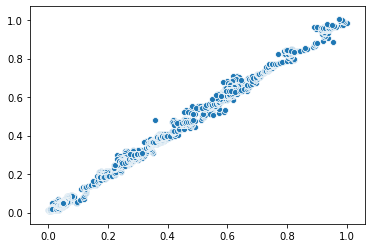

In [311]:
sns.scatterplot(x=y, y=y_pred[:,0])

In [60]:
from sklearn.metrics import mean_squared_error

In [315]:
mean_squared_error(y, y_pred)

0.00045468888669267726

In [317]:
from keras.layers import Dropout

In [318]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(input_shape)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [319]:
model.fit(x= X, y=y, epochs=10, batch_size=32)

Epoch 1/10
1351/1351 [==============================] - 4s 3ms/step - loss: 0.0286
Epoch 2/10
1351/1351 [==============================] - 2s 1ms/step - loss: 0.0037
Epoch 3/10
1351/1351 [==============================] - 2s 1ms/step - loss: 0.0038
Epoch 4/10
1351/1351 [==============================] - 2s 2ms/step - loss: 0.0041
Epoch 5/10
1351/1351 [==============================] - 2s 1ms/step - loss: 0.0029
Epoch 6/10
1351/1351 [==============================] - 2s 1ms/step - loss: 0.0035
Epoch 7/10
1351/1351 [==============================] - 2s 1ms/step - loss: 0.0031
Epoch 8/10
1351/1351 [==============================] - 2s 1ms/step - loss: 0.0026
Epoch 9/10
1351/1351 [==============================] - 2s 1ms/step - loss: 0.0022
Epoch 10/10
1351/1351 [==============================] - 2s 1ms/step - loss: 0.0028


In [325]:
model = Sequential()
model.add(LSTM(128, input_shape=(input_shape), return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(16, activation="relu", kernel_initializer="uniform"))
model.add(Dense(1, activation="linear", kernel_initializer="uniform"))
model.compile(optimizer='adam',loss='mean_squared_error')

In [327]:
model.fit(x= X, y=y, epochs=30, batch_size=32)

Epoch 1/30
1351/1351 [==============================] - 1s 1ms/step - loss: 0.0011
Epoch 2/30
1351/1351 [==============================] - 1s 981us/step - loss: 0.0011
Epoch 3/30
1351/1351 [==============================] - 1s 956us/step - loss: 0.0012
Epoch 4/30
1351/1351 [==============================] - 1s 970us/step - loss: 0.0011
Epoch 5/30
1351/1351 [==============================] - 1s 998us/step - loss: 9.6143e-04
Epoch 6/30
1351/1351 [==============================] - 1s 1ms/step - loss: 0.0010
Epoch 7/30
1351/1351 [==============================] - 1s 1ms/step - loss: 0.0011
Epoch 8/30
1351/1351 [==============================] - 1s 1ms/step - loss: 0.0012
Epoch 9/30
1351/1351 [==============================] - 1s 1ms/step - loss: 0.0010
Epoch 10/30
1351/1351 [==============================] - 1s 1ms/step - loss: 9.9266e-04
Epoch 11/30
1351/1351 [==============================] - 1s 1ms/step - loss: 9.7646e-04
Epoch 12/30
1351/1351 [==============================] - 1s 1ms/s

In [5]:
import splitSequence as sq

In [7]:
data2 = data.iloc[:,:5]
print(list(enumerate(data2.columns)))
data2 = np.array(data2)

[(0, 'Date'), (1, 'Open'), (2, 'High'), (3, 'Low'), (4, 'Close')]


In [8]:
split = round(len(data2) * 0.8)
print(split)
train = data2[:split,:]
test = data2[split:,:]

1105


In [9]:
import splitSequence as sq

In [10]:
train, test = sq.timeseriesSplitTestTrain(data2, proportion=0.8)

In [11]:
train.shape
test.shape

(276, 5)

### We should standardize the training and testing set separately, to avoid look-ahead bias
https://datascience.stackexchange.com/questions/47008/is-normalizing-the-validation-set-of-time-series-a-kind-of-look-ahead-bias

In [63]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
standardized = scaler.fit(train[:,1:])
standardized.mean_

array([67.75902262, 68.55434299, 66.90387249, 67.74956109])

In [4]:
import splitSequence as sq

In [12]:
X_train_open = sq.splitSeqGetX(train[:,1], 50)
X_train_close = sq.splitSeqGetX(train[:,4], 50)
ytrain = sq.splitSeqGety(train[:,1], 50)
X_test_open = sq.splitSeqGetX(test[:,1], 50)
X_test_close = sq.splitSeqGetX(test[:,4], 50)
ytest = sq.splitSeqGety(test[:,1], 50)

In [26]:
X = []
col_index = [1,2,3,4]
for i in col_index:
    X.append(sq.splitSeqGetX(train[:,i], 50))
np.dstack(X).shape

(1055, 50, 4)

In [23]:
np.dstack(X).shape

(1055, 50, 3)

In [47]:
Xtrain = np.dstack((X_train_open, X_train_close))
Xtest = np.dstack((X_test_open, X_test_close))
Xtrain.shape[1:]

(50, 2)

In [48]:
input_shape = Xtrain.shape[1:]

In [50]:
from keras.layers import LSTM, Dense

In [51]:
model = Sequential()
model.add(LSTM(128, input_shape=(input_shape), return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(16, activation="relu", kernel_initializer="uniform"))
model.add(Dense(1, activation="linear", kernel_initializer="uniform"))
model.compile(optimizer='adam',loss='mean_squared_error')

In [54]:
model.fit(x=Xtrain, y=ytrain, epochs=20, batch_size=32)

Epoch 1/20
1055/1055 [==============================] - 2s 2ms/step - loss: 5588.2935
Epoch 2/20
1055/1055 [==============================] - 2s 2ms/step - loss: 5048.2004
Epoch 3/20
1055/1055 [==============================] - 2s 2ms/step - loss: 4281.0692
Epoch 4/20
1055/1055 [==============================] - 2s 2ms/step - loss: 3397.8134
Epoch 5/20
1055/1055 [==============================] - 2s 2ms/step - loss: 2555.3250
Epoch 6/20
1055/1055 [==============================] - 2s 2ms/step - loss: 1881.8009
Epoch 7/20
1055/1055 [==============================] - 2s 2ms/step - loss: 1434.9083
Epoch 8/20
1055/1055 [==============================] - 2s 2ms/step - loss: 1197.0598
Epoch 9/20
1055/1055 [==============================] - 2s 2ms/step - loss: 1098.0957
Epoch 10/20
1055/1055 [==============================] - 2s 2ms/step - loss: 1065.9476
Epoch 11/20
1055/1055 [==============================] - 2s 2ms/step - loss: 1058.1793
Epoch 12/20
1055/1055 [=============================

In [59]:
pred_y = model.predict(x= Xtest, batch_size=32)

In [62]:
from math import sqrt
sqrt(mean_squared_error(ytest, pred_y))

49.27552222027465